In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from neuronal_connections import neuronal_outputs

In [2]:
# VP2 thermosensory neurons reactive to heating
vp2 = [
    720575940619930534,
    720575940611720362,
    720575940615856345,
    720575940617041728,
    720575940646372228,
    720575940636878254,
    720575940638389437
    ]

# VP3a thermosensory neurons reactive to cooling
vp3a = [
    720575940616999069,
    720575940621659563,
    720575940621831804,
    720575940625293514,
    720575940627677258,
    720575940613191591,
    720575940650751873
    ]

# VP1m thermosensory? neurons, putative humid reactivity
vp1m = [
    720575940613794114,
    720575940616039197,
    720575940618512624,
    720575940619024774,
    720575940623793741,
    720575940627944464,
    720575940629007230,
    720575940631875298,
    720575940632913461,
    720575940633059381,
    720575940635969399,
    720575940646785924,
    720575940622082518
    ]

# VP4 hygrosensory neurons reactive to dryness
vp4 = [
    720575940613914774,
    720575940616239873,
    720575940617969961,
    720575940620602236,
    720575940620634537,
    720575940624673936,
    720575940630644281,
    720575940633280107,
    720575940638509952,
    720575940611377893,
    720575940614711638,
    720575940614919709,
    720575940618531544,
    720575940618574983,
    720575940619075073,
    720575940621009023,
    720575940622581651,
    720575940623030861,
    720575940623065013,
    720575940625868184,
    720575940626256992,
    720575940627150991,
    720575940628945516,
    720575940630282297,
    720575940637494837,
    720575940643707246,
    720575940622625097,
    720575940629275898,
    720575940633670904
    ]

# VP5 hygrosensory neurons reactive to humidity
vp5 = [
    720575940614634786,
    720575940635767524,
    720575940614842262,
    720575940614996018,
    720575940620459702,
    720575940622457028,
    720575940624011278,
    720575940626125626,
    720575940629693302,
    720575940632714465,
    720575940633274524,
    720575940637096026,
    720575940638300093,
    720575940648747385,
    720575940615553397,
    720575940627264262
    ]

# VP1d hygrosensory? neurons, putative reactive to evaporation
vp1d = [
    720575940603820716,
    720575940605264305,
    720575940609792206,
    720575940610460514,
    720575940614570793,
    720575940617665950,
    720575940617986089,
    720575940617986345,
    720575940620847086,
    720575940623476661,
    720575940627271230,
    720575940630271862,
    720575940635916942,
    720575940622112726,
    720575940623209703,
    720575940634781620
    ]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l = [
    720575940614921501,
    720575940617987113,
    720575940620644446,
    720575940622700749,
    720575940651079158,
    720575940604931249,
    720575940613941533,
    720575940613942045,
    720575940613942301,
    720575940613942557,
    720575940625148174,
    720575940625657928,
    720575940626580361
    ]

all_vps = vp2 + vp3a + vp1m + vp4 + vp5 + vp1d + vp1l

In [3]:
#Connections dataset and additional data sets

# Load the connections dataset
# columns: pre_root_id, post_root_id, neuropil, syn_count, nt_type
connections = pd.read_csv('connections_783.csv.gz')

# Neuropil synapses
# columns: root_id, input synapses, input partners, output synapses, output partners, etc
# Keep only root_id, input syanapses, output synapses
neuropil_synapse = pd.read_csv('neuropil_synapse_table_783.csv.gz')[['root_id','input synapses','output synapses']]

# Rename with underscores
neuropil_synapse.rename(columns={'input synapses': 'input_synapses','output synapses': 'output_synapses'}, inplace=True)

# Load classification table
# columns: root_id, flow, super_class, side, etc
# Keep only root_id and side
classif = pd.read_csv('classification_783.csv.gz')[['root_id','side']]
classification = pd.read_csv('classification_783.csv.gz')

# Load data about each neuron
# columns: root_id, group, nt_type, etc
# Keep only root_id, nt_type
neurons = pd.read_csv('neurons_783.csv.gz')[['root_id','nt_type']]

# Merging additional data in one data set
neurons_data = pd.merge(neurons, pd.merge(classif, neuropil_synapse, on='root_id',how= 'outer'), on='root_id',how='outer')

# VP2 thermosensory neurons reactive to heating
vp2_df = classification[classification['root_id'].isin(vp2)]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l_df = classification[classification['root_id'].isin(vp1l)]

# VP1d thermosensory neurons, putative reactive to warming
vp1d_df = classification[classification['root_id'].isin(vp1d)]

# VP1m hygrosensory? neurons, putative reactive to humidity
vp1m_df = classification[classification['root_id'].isin(vp1m)]

# VP3 thermosensory neurons, putative reactive to cooling
vp3a_df = classification[classification['root_id'].isin(vp3a)]

# VP4 thermosensory neurons, putative reactive to warming
vp4_df = classification[classification['root_id'].isin(vp4)]

# VP5 hygrosensory neurons reactive to humidity
vp5_df = classification[classification['root_id'].isin(vp5)]

# Create a dictionary to store all dataframes
vp_dfs = {
    'VP2': vp2_df,
    'VP1l': vp1l_df,
    'VP1d': vp1d_df,
    'VP1m': vp1m_df,
    'VP3a': vp3a_df,
    'VP4': vp4_df,
    'VP5': vp5_df
}

In [4]:
# Create dictionary to store filtered connection dataframes for each VP type
connections_2N = {}
neurons_2N = {}

# For each VP type, filter connections where pre_root_id matches VP root_ids
for vp_type, vp_df in vp_dfs.items():
    downstream = connections[(connections['pre_root_id'].isin(vp_df['root_id'])) & (connections['syn_count'] >= 5)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    # Use .loc to properly set values in the dataframe
    downstream_classification.loc[:,'intraVP'] = downstream_classification['root_id'].isin(vp_df['root_id'])
    
    connections_2N[vp_type] = downstream
    neurons_2N[vp_type] = downstream_classification

Unique root_id count for VP2: 106
Unique root_id count for VP1l: 77
Unique root_id count for VP1d: 100
Unique root_id count for VP1m: 117
Unique root_id count for VP3a: 57
Unique root_id count for VP4: 75
Unique root_id count for VP5: 43
Unique root_id count for all VPs: 330


Count of neurons with intraVP=True for VP2: 3
Count of neurons with intraVP=True for VP1l: 13
Count of neurons with intraVP=True for VP1d: 2
Count of neurons with intraVP=True for VP1m: 6
Count of neurons with intraVP=True for VP3a: 7
Count of neurons with intraVP=True for VP4: 1
Count of neurons with intraVP=True for VP5: 0
Count of neurons with intraVP=True for all VPs: 32


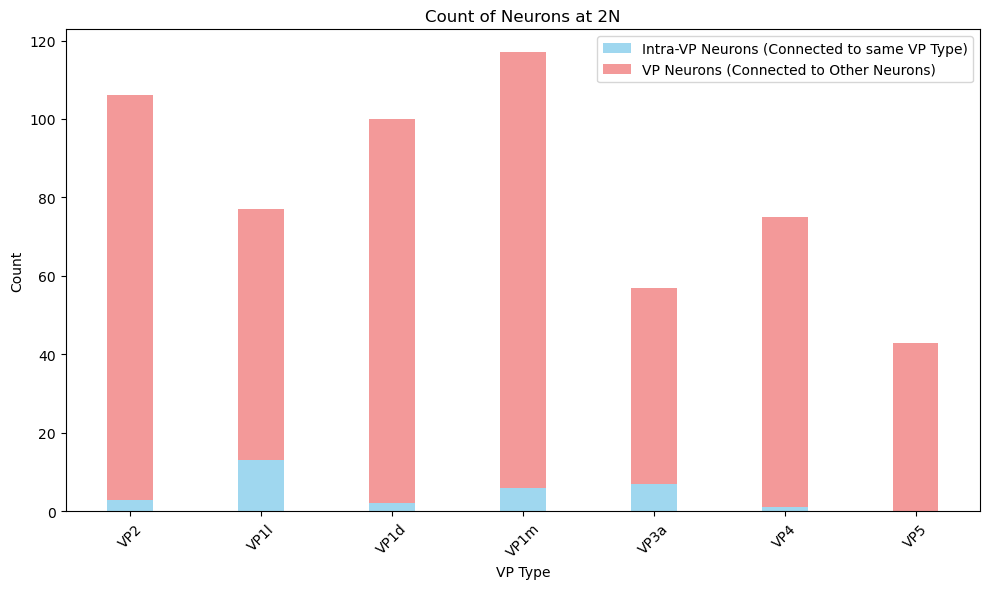

In [10]:
# Loop through all VP types in neurons_2N and determine the amount of unique root_id
unique_2N_root_id_counts = {}
all_2N_unique_root_id = set()
for vp_type, class_df in neurons_2N.items():
    unique_2N_root_id_counts[vp_type] = class_df['root_id'].nunique()
    all_2N_unique_root_id.update(class_df['root_id'])

# Print the counts
for vp_type, count in unique_2N_root_id_counts.items():
    print(f"Unique root_id count for {vp_type}: {count}")
print(f"Unique root_id count for all VPs: {len(all_2N_unique_root_id)}")
print("\n")

# Loop through all VP types in neurons_2N and count neurons where intraVP is True
intra_vp_neuron_counts = {}
total_intra_vp_neurons = 0
for vp_type, class_df in neurons_2N.items():
    intra_vp_neuron_count = class_df[class_df['intraVP'] == True].shape[0]
    intra_vp_neuron_counts[vp_type] = intra_vp_neuron_count
    total_intra_vp_neurons += intra_vp_neuron_count

# Print the counts
for vp_type, count in intra_vp_neuron_counts.items():
    print(f"Count of neurons with intraVP=True for {vp_type}: {count}")
print(f"Count of neurons with intraVP=True for all VPs: {total_intra_vp_neurons}")

# Combine bar plots for intra_vp_neuron_counts and unique_root_id_counts by VP type with overlap, subtracting intra VP from unique root IDs
plt.figure(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

# Set positions of bars on x-axis
index = np.arange(len(intra_vp_neuron_counts.keys()))

# Create bars for intra_vp_neuron_counts
plt.bar(index, intra_vp_neuron_counts.values(), bar_width, alpha=opacity, label='Intra-VP Neurons', color='skyblue')

# Adjust unique_root_id_counts by subtracting intra_vp_neuron_counts
adjusted_unique_root_id_counts = {vp_type: unique_2N_root_id_counts[vp_type] - intra_vp_neuron_counts[vp_type] for vp_type in unique_2N_root_id_counts.keys()}

# Create bars for adjusted unique_root_id_counts with overlap
plt.bar(index, adjusted_unique_root_id_counts.values(), bar_width, alpha=opacity, label='Adjusted Unique Root IDs', bottom=intra_vp_neuron_counts.values(), color='lightcoral')

plt.xlabel('VP Type')
plt.ylabel('Count')
plt.title('Count of Neurons at 2N')
plt.xticks(index, intra_vp_neuron_counts.keys(), rotation=45)
plt.legend(['Intra-VP Neurons (Connected to same VP Type)', 'VP Neurons (Connected to Other Neurons)'])
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('vp_neuron_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

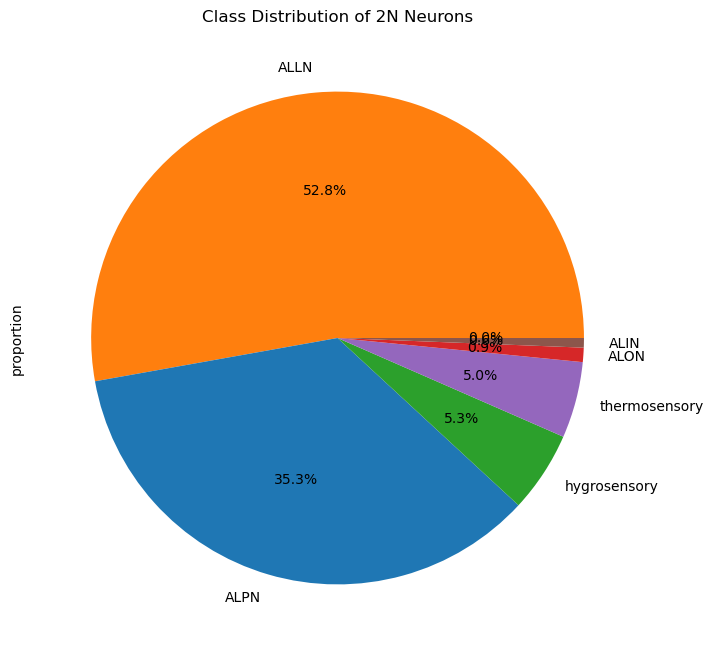

In [39]:
# Define a consistent color palette for all VP plots
class_colors = {
    'ALLN': '#ff7f0e',
    'ALPN': '#1f77b4', 
    'hygrosensory': '#2ca02c',
    'thermosensory': '#9467bd',
    'ALON': '#d62728',
    'ALIN': '#8c564b',
}

# Merge all_2N_unique_root_id with classification dataframe
all_2N_df = pd.DataFrame(list(all_2N_unique_root_id), columns=['root_id']).merge(classification, on='root_id', how='inner')

plt.figure(figsize=(10, 8))
class_counts = all_2N_df['class'].value_counts(normalize=True)
other_counts = class_counts[class_counts < 0.0045].sum()
class_counts = class_counts[class_counts >= 0.0045]
class_counts['other'] = other_counts

# Get colors for each class, using class_colors if available
colors = [class_colors[c] if c in class_colors else '#7f7f7f' for c in class_counts.index]

class_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution of 2N Neurons')
# Save the current figure to PDF
plt.savefig('2N_neuron_classes.pdf', bbox_inches='tight', dpi=300)
plt.show()

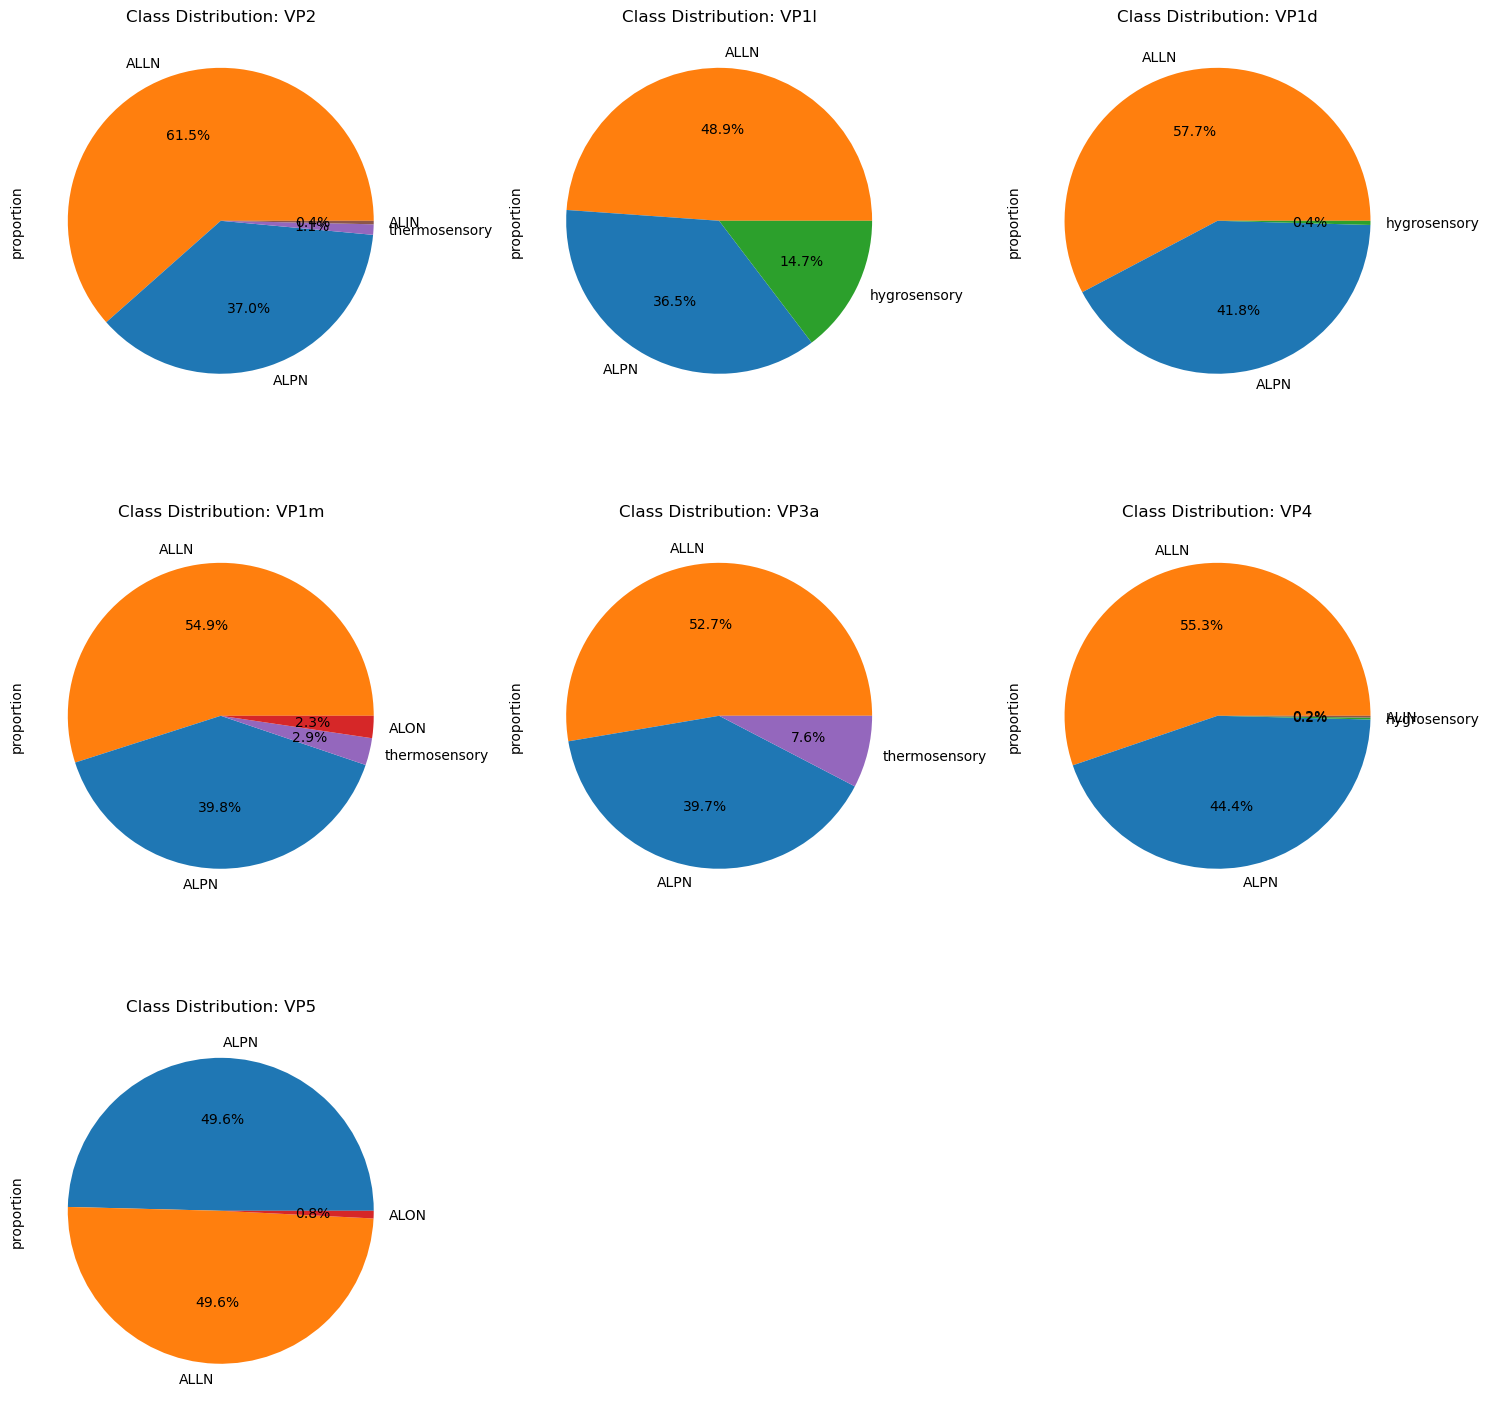

In [40]:
# Create a figure with subplots for each VP type's class distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_2N.items()):
    # Merge with classification data to get classes
    vp_class_df = vp_df.merge(classification, left_on='post_root_id', right_on='root_id', how='inner')
    
    # Calculate class distribution
    class_counts = vp_class_df['class'].value_counts(normalize=True)
    
    # Create pie chart with consistent colors
    colors = [class_colors[c] if c in class_colors else class_colors['other'] for c in class_counts.index]
    class_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=colors)
    axs[i].set_title(f'Class Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('2N_vp_class_distributions.pdf', bbox_inches='tight', dpi=300)
plt.show()


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

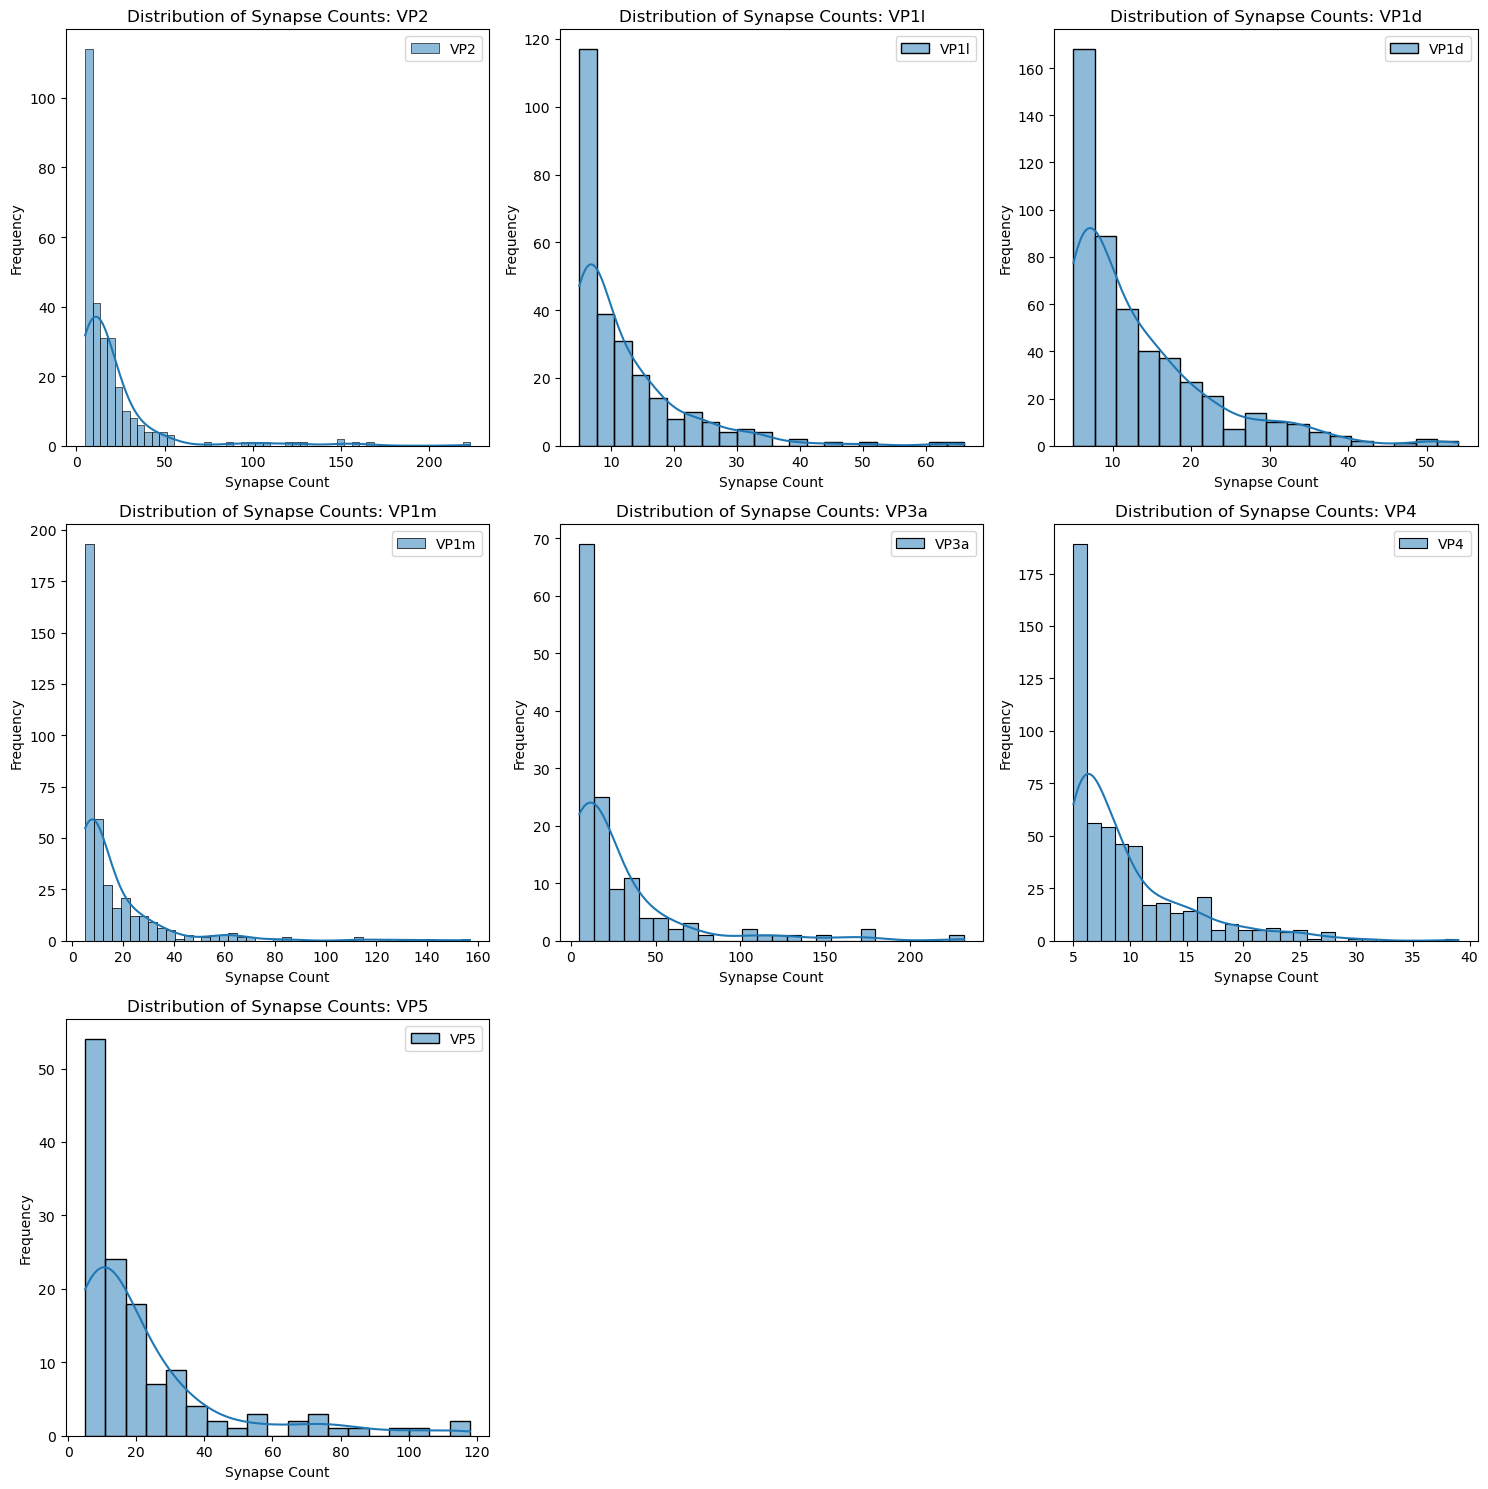

Largest 5 syn_counts and post_root_id in connections_2N:
VP Type: VP2, syn_count: 223, post_root_id: 720575940619895125
VP Type: VP1l, syn_count: 66, post_root_id: 720575940628338028
VP Type: VP1d, syn_count: 54, post_root_id: 720575940612284569
VP Type: VP1m, syn_count: 157, post_root_id: 720575940619411147
VP Type: VP3a, syn_count: 232, post_root_id: 720575940633074145
VP Type: VP4, syn_count: 39, post_root_id: 720575940626043218
VP Type: VP5, syn_count: 118, post_root_id: 720575940604414636
                   root_id       flow super_class class      sub_class  \
108183  720575940619895125  intrinsic     central  ALPN  uniglomerular   

       cell_type hemibrain_type hemilineage  side nerve  intraVP  
108183       NaN       VP2_adPN       ALad1  left   NaN    False  


In [11]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through connections_2N and graph the distribution of syn_count by VP modality
for i, (vp_type, class_df) in enumerate(connections_2N.items()):
    # Plot the distribution of syn_count by VP modality
    sns.histplot(class_df['syn_count'], kde=True, label=vp_type, ax=axs[i])
    axs[i].set_title(f'Distribution of Synapse Counts: {vp_type}')
    axs[i].set_xlabel('Synapse Count')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('vp_syn_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Explore highly connected neurons
# Find the largest 5 syn_counts in the connections_2N
largest_5_syn_counts = {vp_type: class_df.loc[class_df['syn_count'].idxmax()]['syn_count'] for vp_type, class_df in connections_2N.items()}

# Print the largest 5 syn_counts and post_root_id
print("Largest 5 syn_counts and post_root_id in connections_2N:")
for vp_type, class_df in connections_2N.items():
    largest_syn_count_row = class_df.loc[class_df['syn_count'].idxmax()]
    print(f"VP Type: {vp_type}, syn_count: {largest_syn_count_row['syn_count']}, post_root_id: {largest_syn_count_row['post_root_id']}")

print(neurons_2N['VP2'].loc[neurons_2N['VP2']['root_id'] == 720575940619895125])

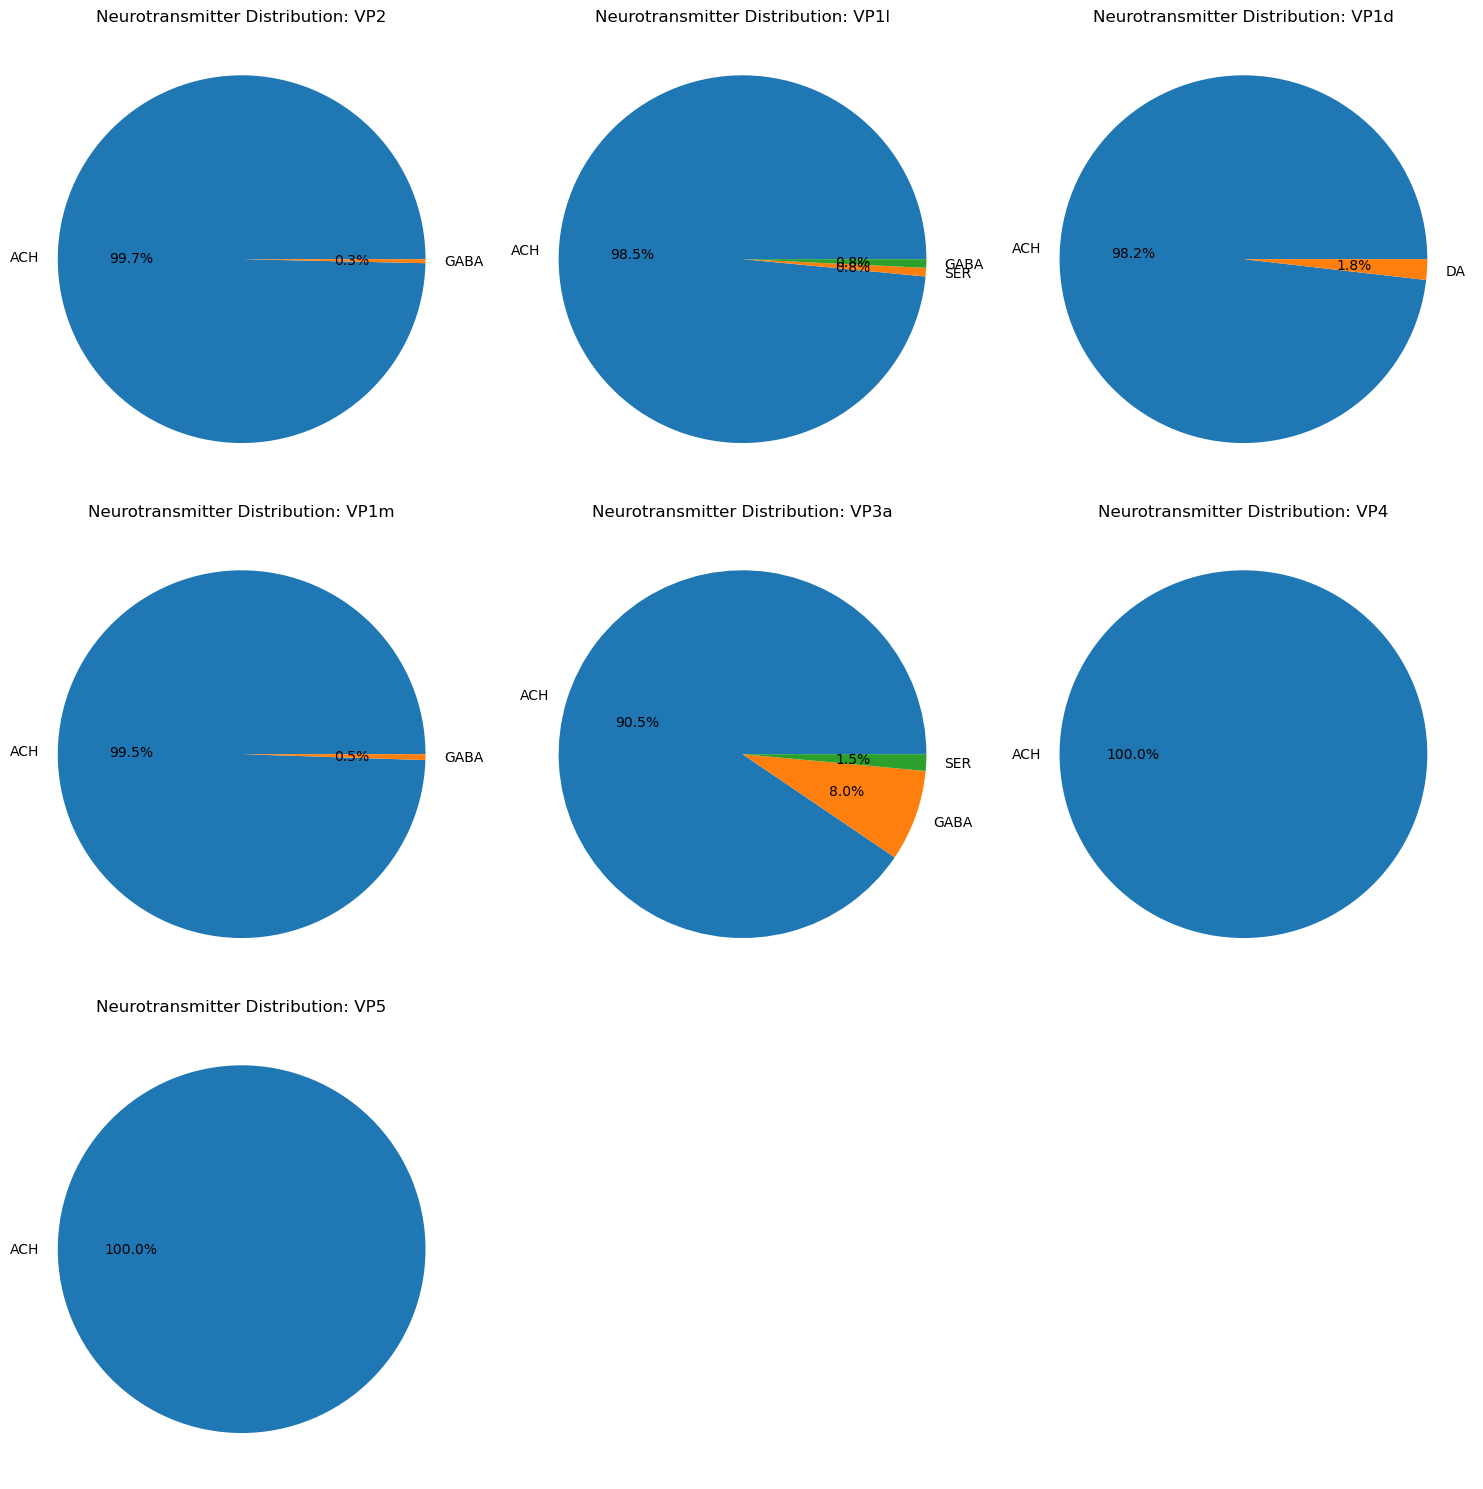

In [16]:
# Pie charts for nt_type
# Create a figure with subplots for each VP type's neurotransmitter distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_2N.items()):
    # Count the neurotransmitter types
    nt_counts = vp_df['nt_type'].value_counts()
    
    # Create pie chart
    axs[i].pie(nt_counts.values, labels=nt_counts.index, autopct='%1.1f%%')
    axs[i].set_title(f'Neurotransmitter Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('vp_neurotransmitter_dist.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [17]:
# Create dictionary to store filtered connection dataframes for each VP type
connections_3N = {}
neurons_3N = {}

# For each 2N, filter connections where pre_root_id matches 2N root_id with synapse filter of 10
for vp_type, vp_df in neurons_2N.items():
    downstream = connections[(connections['pre_root_id'].isin(vp_df[vp_df['intraVP'] == False]['root_id'])) & (connections['syn_count'] >= 10)]
    # Create a copy of the filtered classification data
    downstream_classification = classification[classification['root_id'].isin(downstream['post_root_id'])].copy()
    # Use .loc to properly set values in the dataframe
    ## TODO:  special class for 2N of same VP vs other VP
    downstream_classification.loc[:,'intraVP_2N'] = downstream_classification['root_id'].isin(vp_df['root_id'])
    downstream_classification['interVP_2N'] = (downstream_classification['root_id'].isin(all_2N_unique_root_id) == True) & (downstream_classification['intraVP_2N'] == False)

    
    connections_3N[vp_type] = downstream
    neurons_3N[vp_type] = downstream_classification


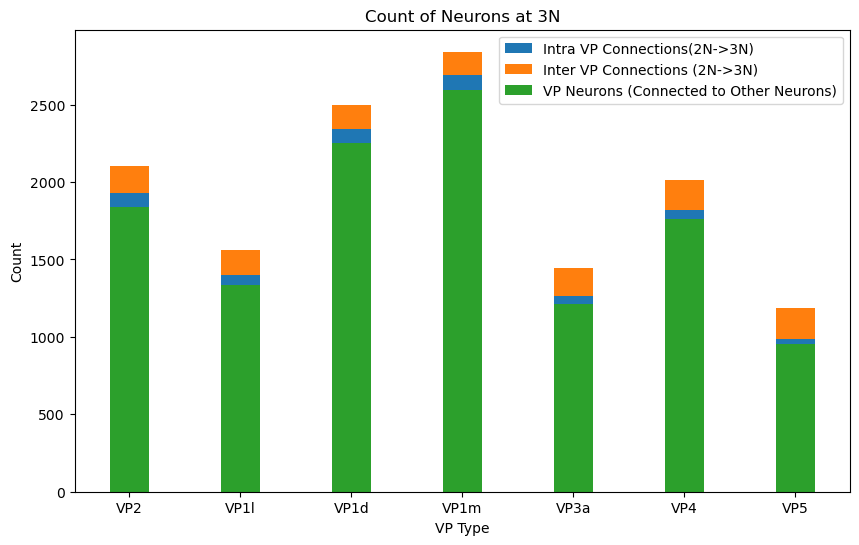

Total unique neuron root_id across all VP in neurons_3N: 4030


In [21]:
# Get the counts of all neurons, intraVP_2N and interVP_2N
all_neurons_count = [len(neurons_3N[vp_type]) for vp_type in neurons_3N]
intraVP_2N_count = [len(neurons_3N[vp_type][neurons_3N[vp_type]['intraVP_2N'] == True]) for vp_type in neurons_3N]
interVP_2N_count = [len(neurons_3N[vp_type][neurons_3N[vp_type]['interVP_2N'] == True]) for vp_type in neurons_3N]

# Calculate other neurons (not intra or inter VP)
other_neurons_count = [all_neurons_count[i] - intraVP_2N_count[i] - interVP_2N_count[i] for i in range(len(all_neurons_count))]

# Create the stacked bar plot
x = np.arange(len(neurons_3N))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, intraVP_2N_count, width, bottom=other_neurons_count, label='Intra VP Connections(2N->3N)')
plt.bar(x, interVP_2N_count, width, bottom=[other_neurons_count[i] + intraVP_2N_count[i] for i in range(len(other_neurons_count))], label='Inter VP Connections (2N->3N)')
plt.bar(x, other_neurons_count, width, label='VP Neurons (Connected to Other Neurons)')


# Adding labels
plt.xlabel('VP Type')
plt.ylabel('Count')
plt.title('Count of Neurons at 3N')
plt.xticks(x, neurons_3N.keys())
plt.legend()

# Save the current figure to PDF
plt.savefig('3N_neuron_counts.pdf', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

# Calculate the total unique neuron root_id across all VP in neurons_3N
all_3N_unique_root_id = set()
for vp_type in neurons_3N:
    all_3N_unique_root_id.update(neurons_3N[vp_type]['root_id'])

print(f"Total unique neuron root_id across all VP in neurons_3N: {len(all_3N_unique_root_id)}")
# Convert the set of unique root IDs to a DataFrame
all_3N_unique_root_id_df = pd.DataFrame(list(all_3N_unique_root_id), columns=['root_id'])

# Save to CSV
all_3N_unique_root_id_df.to_csv('3N_ids.csv', index=False)



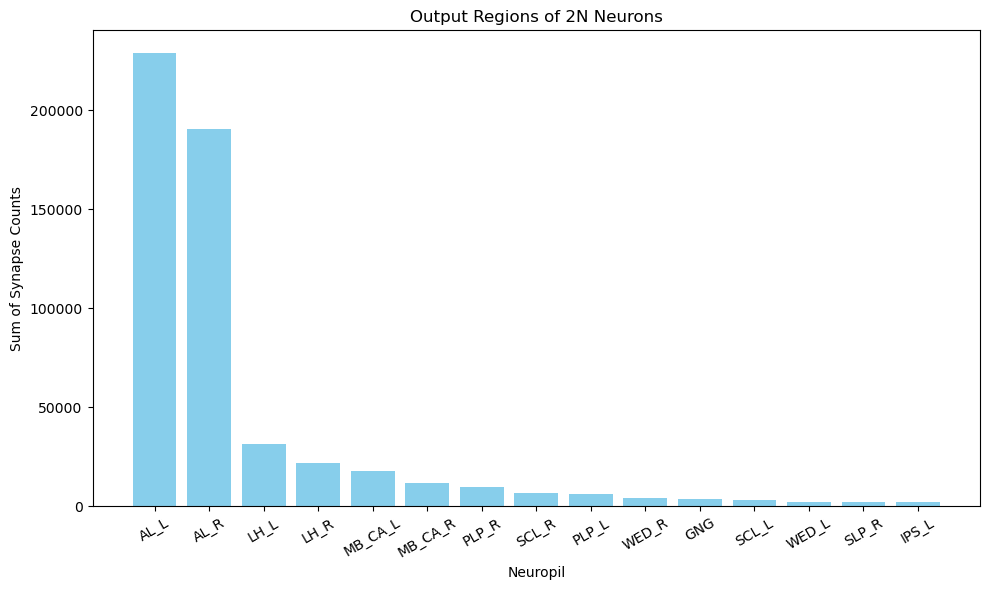

In [23]:
neuropils = pd.read_csv('neuropil_synapse_table_783.csv.gz')
all_2N_unique_root_id_df = pd.DataFrame(list(all_2N_unique_root_id), columns=['root_id'])
neuropils_2N = pd.merge(all_2N_unique_root_id_df, neuropils, on='root_id', how='inner')

# Excluding specified columns and summing the neuropils_2N columns
neuropils_2N_sum = neuropils_2N.drop(columns=[col for col in neuropils_2N.columns if 'input' in col or 'partners' in col], axis=1).sum(axis=0)
neuropils_2N_sum = neuropils_2N_sum.drop(['root_id','output synapses'])
# Plotting the bar graph excluding columns with sum 0
filtered_neuropils_2N_sum = neuropils_2N_sum.nlargest(15)
filtered_neuropils_2N_sum.index = filtered_neuropils_2N_sum.index.str.split().str[-1]

plt.figure(figsize=(10, 6))
plt.bar(filtered_neuropils_2N_sum.index, filtered_neuropils_2N_sum.values, color='skyblue')
plt.xlabel('Neuropil')
plt.ylabel('Sum of Synapse Counts')
plt.title('Output Regions of 2N Neurons')
plt.xticks(rotation=30)
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('2N_neuropil_output.pdf', bbox_inches='tight', dpi=300)
plt.show()



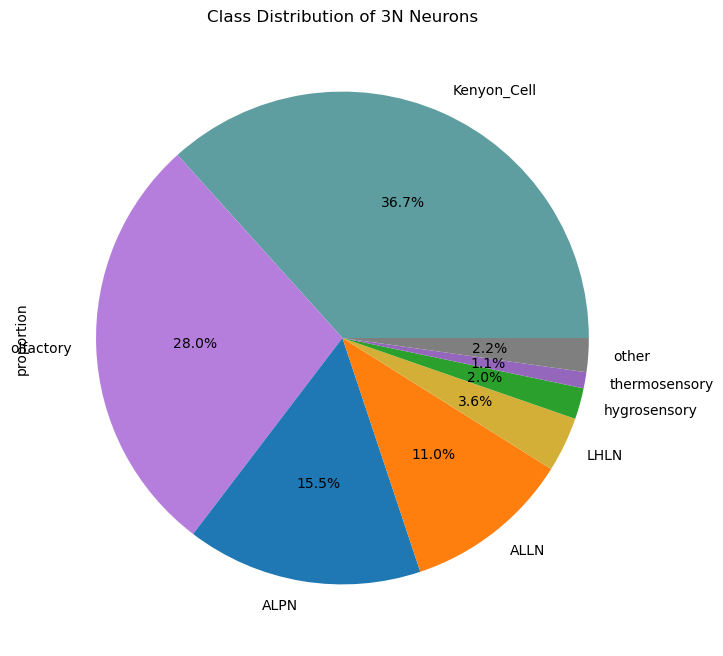

In [50]:
# Define a consistent color palette for all VP plots
N3_class_colors = {
    'Kenyon_Cell': '#5F9EA0',
    'olfactory': '#B57EDC',
    'LHLN': '#D4AF37',
    'hygrosensory': '#2ca02c',
    'thermosensory': '#9467bd',
    'ALPN': '#1f77b4',
    'ALLN': '#ff7f0e',
    'ALON': '#d62728',
    'ALIN': '#8c564b',
    'other': '#7f7f7f'
}

# Merge all_3N_unique_root_id with classification dataframe
all_3N_df = pd.DataFrame(list(all_3N_unique_root_id), columns=['root_id']).merge(classification, on='root_id', how='inner')

plt.figure(figsize=(10, 8))
class_counts = all_3N_df['class'].value_counts(normalize=True)
other_counts = class_counts[class_counts < 0.0055].sum()
class_counts = class_counts[class_counts >= 0.0055]
class_counts['other'] = other_counts

# Get colors for each class, using 'gray' for 'other'
colors = [N3_class_colors.get(cls, 'gray') for cls in class_counts.index]

class_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution of 3N Neurons')
# Save the current figure to PDF
plt.savefig('3N_neuron_classes.pdf', bbox_inches='tight', dpi=300)
plt.show()

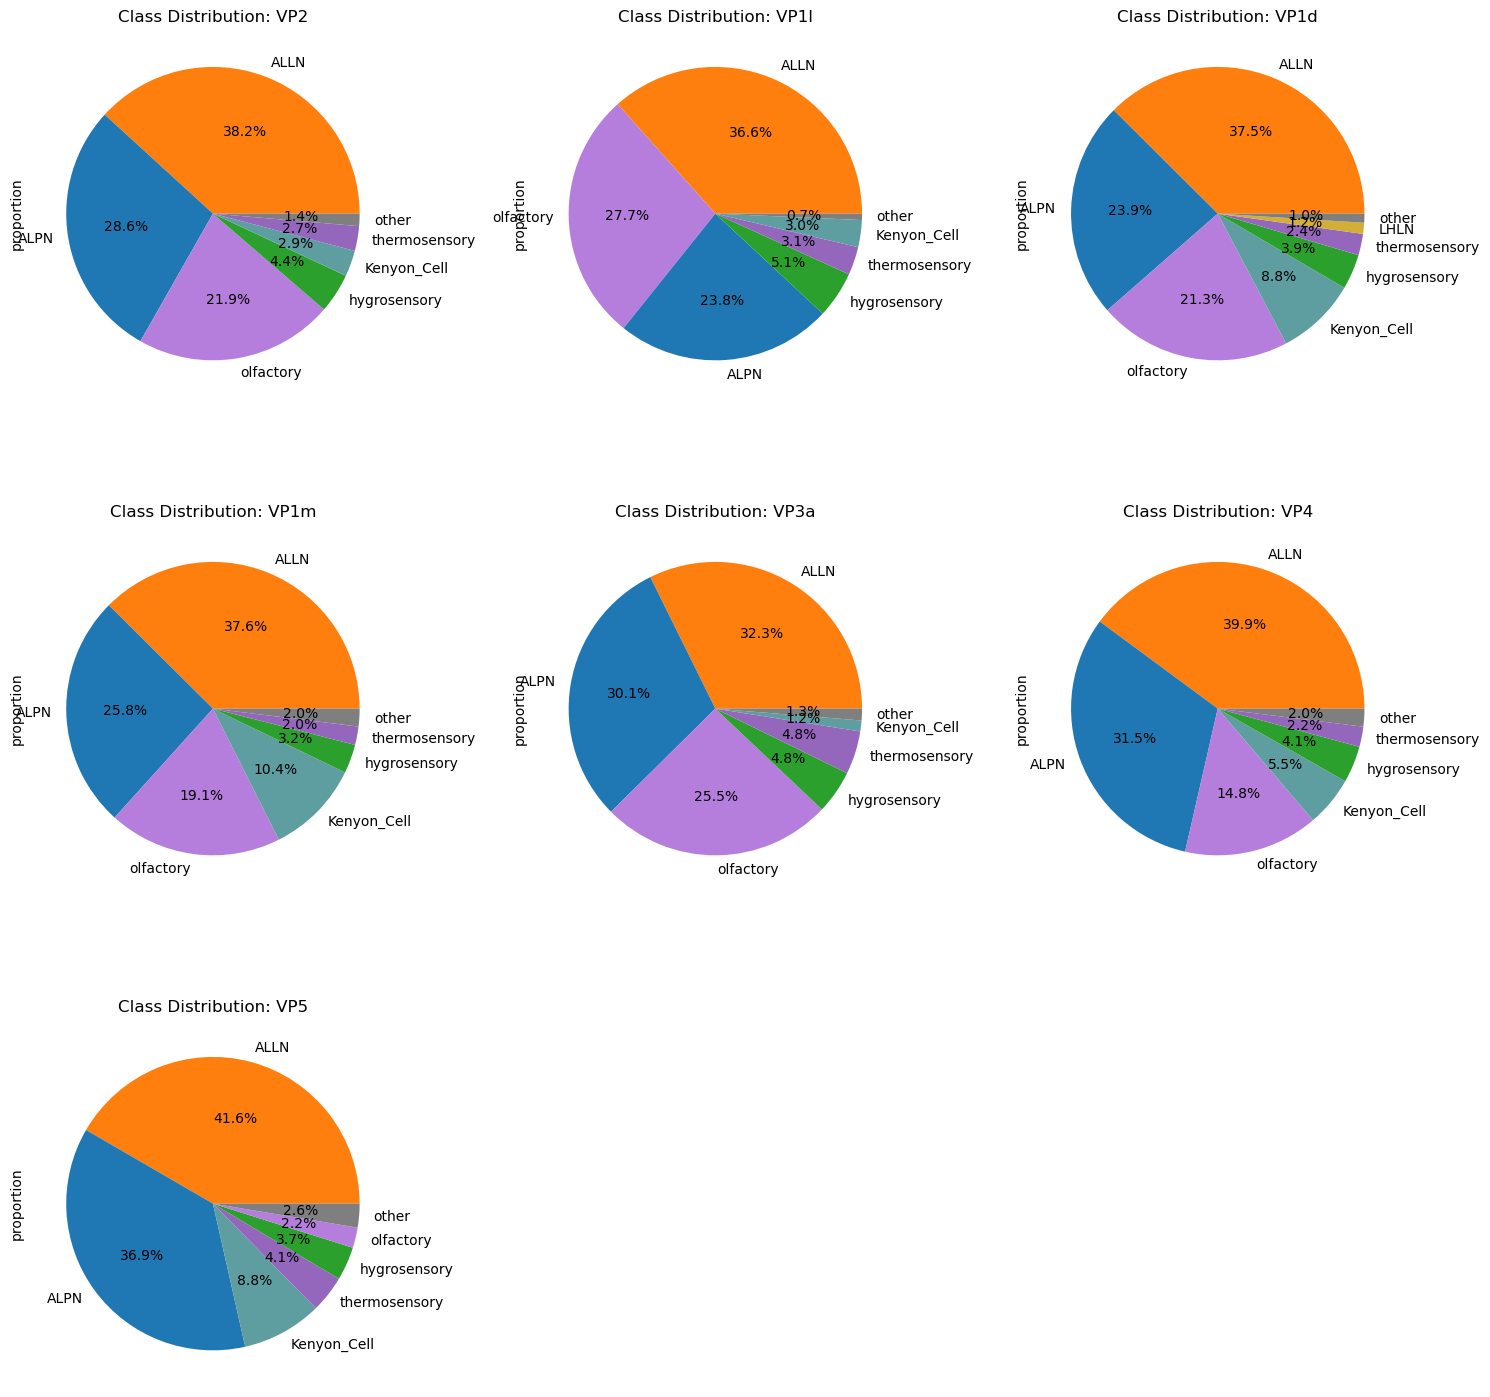

In [52]:
# Create a figure with subplots for each VP type's class distribution
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each VP type
for i, (vp_type, vp_df) in enumerate(connections_3N.items()):
    # Merge with classification data to get classes
    vp_class_df = vp_df.merge(classification, left_on='post_root_id', right_on='root_id', how='inner')
    
    # Calculate class distribution
    class_counts = vp_class_df['class'].value_counts(normalize=True)
    
    # Combine classes with less than 1% into 'other'
    other_mask = class_counts < 0.01
    other_sum = class_counts[other_mask].sum()
    class_counts = class_counts[~other_mask]
    if other_sum > 0:
        class_counts['other'] = other_sum
    
    # Create pie chart with consistent colors
    colors = [N3_class_colors[c] if c in N3_class_colors else N3_class_colors['other'] for c in class_counts.index]
    class_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[i], colors=colors)
    axs[i].set_title(f'Class Distribution: {vp_type}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# Save the current figure to PDF
plt.savefig('3N_vp_class_distributions.pdf', bbox_inches='tight', dpi=300)
plt.show()

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

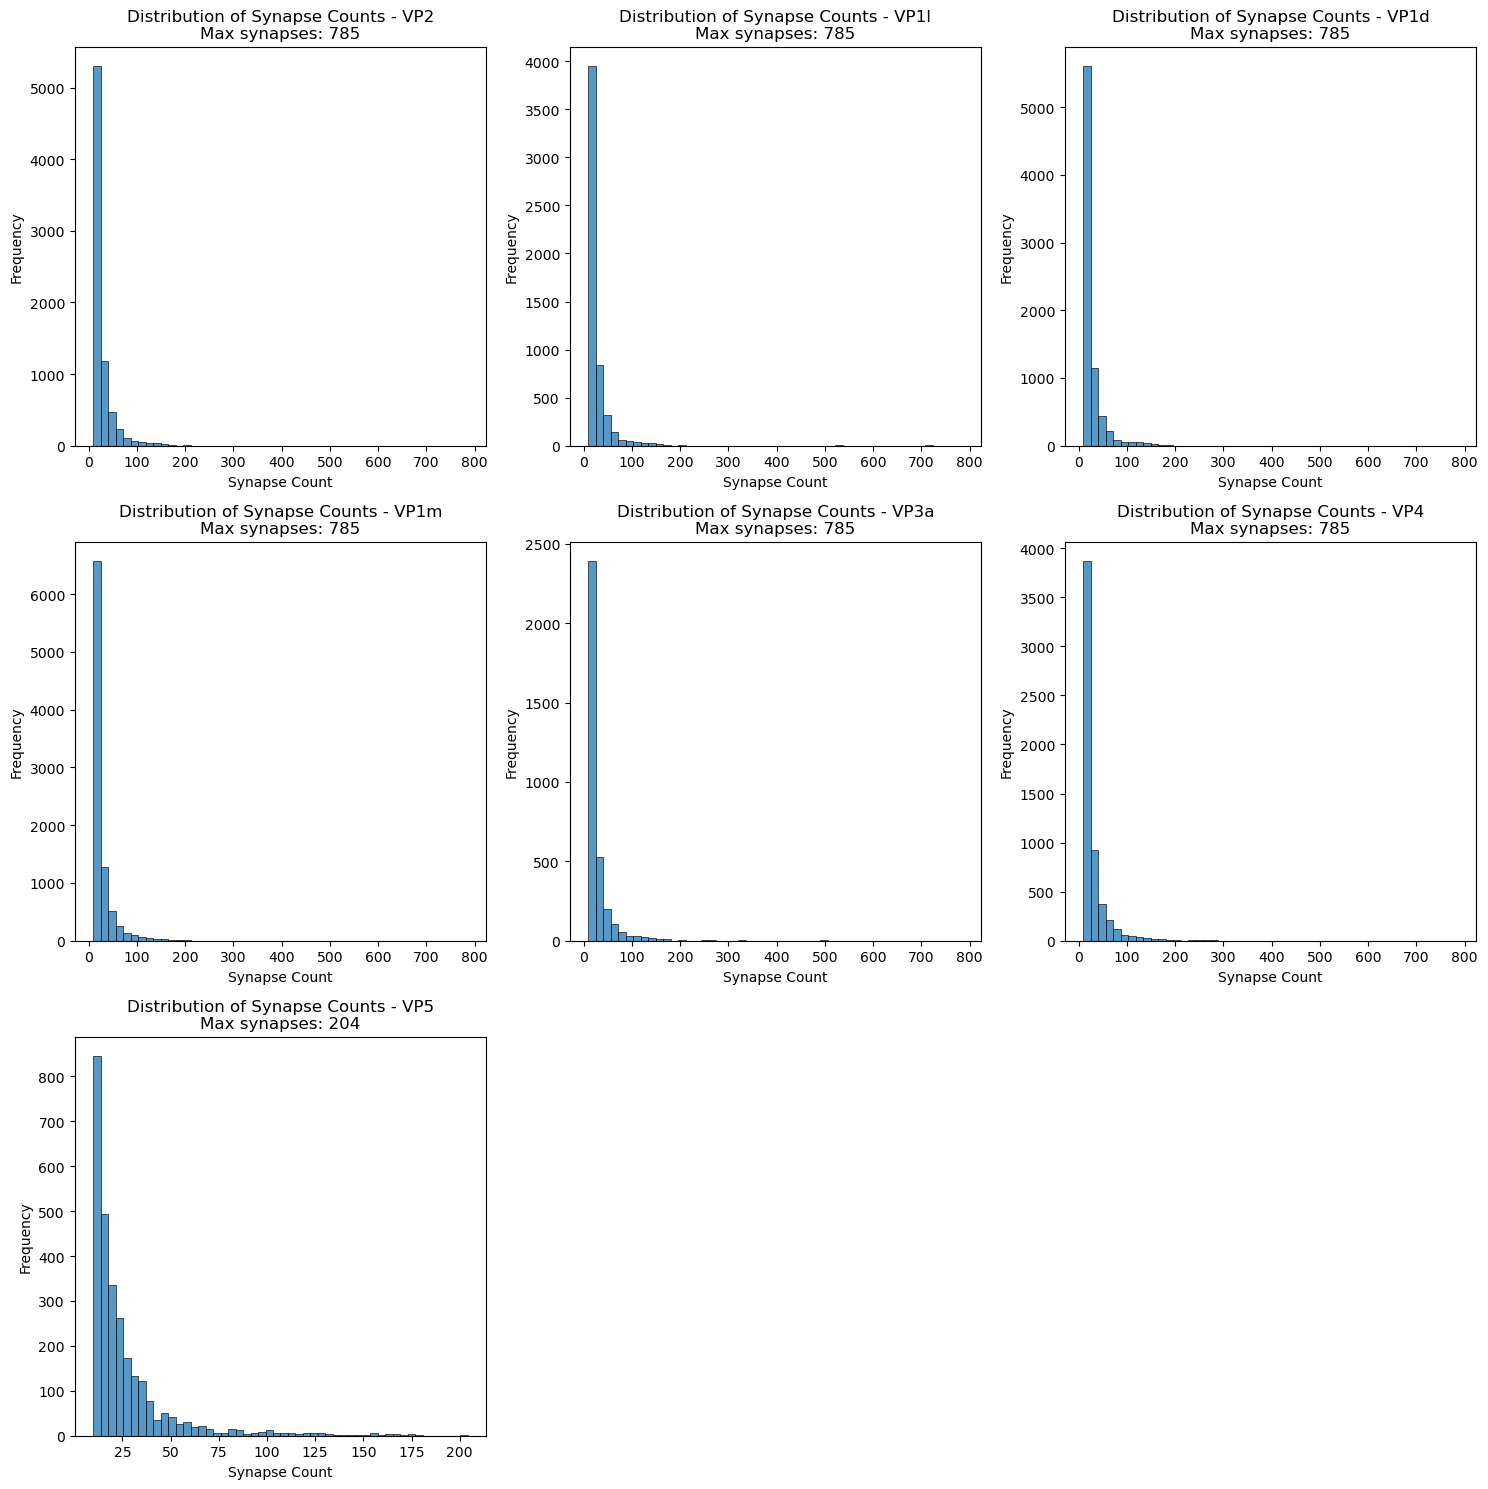


VP2 connection with 785 synapses:
              pre_root_id        post_root_id neuropil  syn_count nt_type
16159  720575940632795532  720575940638128474     AL_L        785    GABA


In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, vp_type in enumerate(connections_3N):
    if i < len(axes):
        max_synapses = connections_3N[vp_type]['syn_count'].max()
        sns.histplot(data=connections_3N[vp_type], x='syn_count', bins=50, ax=axes[i])
        axes[i].set_title(f'Distribution of Synapse Counts - {vp_type}\nMax synapses: {max_synapses}')
        axes[i].set_xlabel('Synapse Count') 
        axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('3N_vp_syn_counts.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Get the entry with syn_count=785 from VP2 connections
vp2_max_connection = connections_3N['VP2'][connections_3N['VP2']['syn_count'] == 785]
print("\nVP2 connection with 785 synapses:")
print(vp2_max_connection)




/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

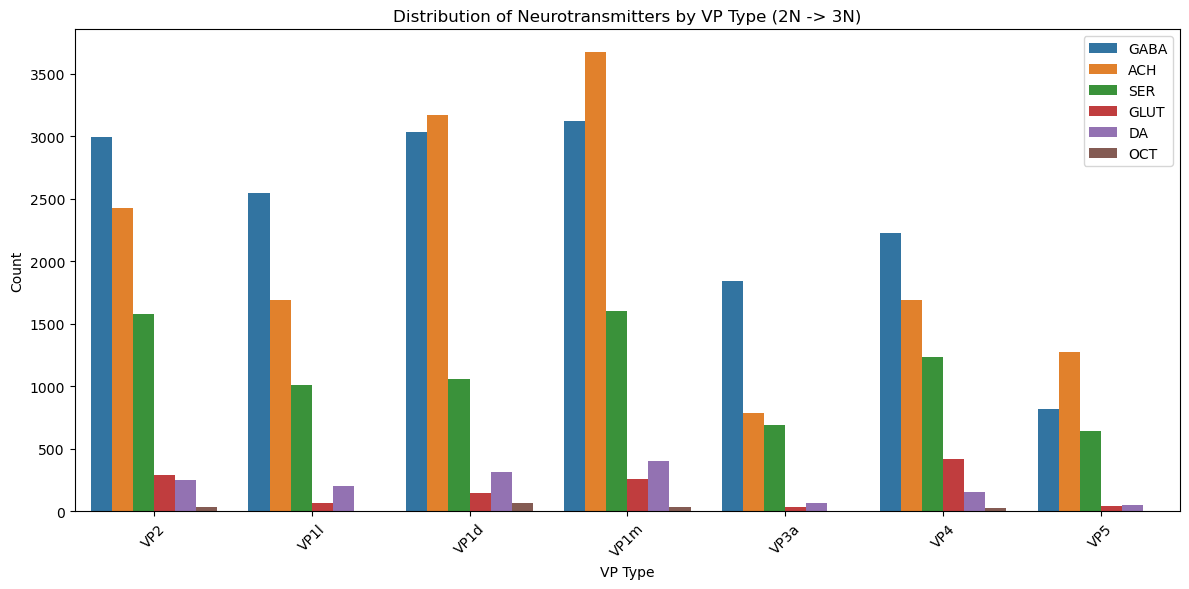

In [31]:
# Create a DataFrame to store counts for each VP and neurotransmitter type
vp_nt_counts = []
for vp_type in connections_3N:
    # Count occurrences of each neurotransmitter type for this VP
    nt_counts = connections_3N[vp_type]['nt_type'].value_counts().reset_index()
    nt_counts.columns = ['nt_type', 'count']
    nt_counts['vp'] = vp_type
    vp_nt_counts.append(nt_counts)

# Combine all counts into one DataFrame
vp_nt_df = pd.concat(vp_nt_counts, ignore_index=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=vp_nt_df, x='vp', y='count', hue='nt_type')
plt.title('Distribution of Neurotransmitters by VP Type (2N -> 3N)')
plt.xlabel('VP Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
#labels = ['GABA', 'Acetylcholine', 'Serotonin', 'Glutamate', 'Dopamine', 'Octopamine']
plt.legend()
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('3N_neurotransmitter_dist.pdf', bbox_inches='tight', dpi=300)
plt.show()



## In silico activation of neurons

In [87]:
rates = [25,50,75,100,125,150,175,200] # these are the different stimulation rates for the simulations

for vp_type, vp_df in vp_dfs.items():
    for i in rates:
        ids_activated = pd.read_csv(f'./results/cellTypes/CSVs/{vp_type.lower()}_{i}Hz_rates.csv')['flyid'].values
        neurons_2N[vp_type][f'activation_{i}Hz'] = neurons_2N[vp_type]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        neurons_3N[vp_type][f'activation_{i}Hz'] = neurons_3N[vp_type]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        connections_2N[vp_type][f'activation_{i}Hz'] = connections_2N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        connections_3N[vp_type][f'activation_{i}Hz'] = connections_3N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')

        # DEBUG
        #activation_cols = [col for col in neurons_3N[vp_type].columns if 'activation' in col or 'root_id' in col]
        #print(neurons_2N[vp_type][activation_cols])
        #print(neurons_3N[vp_type][activation_cols])
        #print(connections_3N[vp_type])
        #print(connections_2N[vp_type])

/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_97275/735610233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections_2N[vp_type][f'activation_{i}Hz'] = connections_2N[vp_type]['post_root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_97275/735610233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections_3N[vp_type][f'activation_{i}Hz'] = connections_3N[vp_type]['post_root_id'].apply(lambda

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

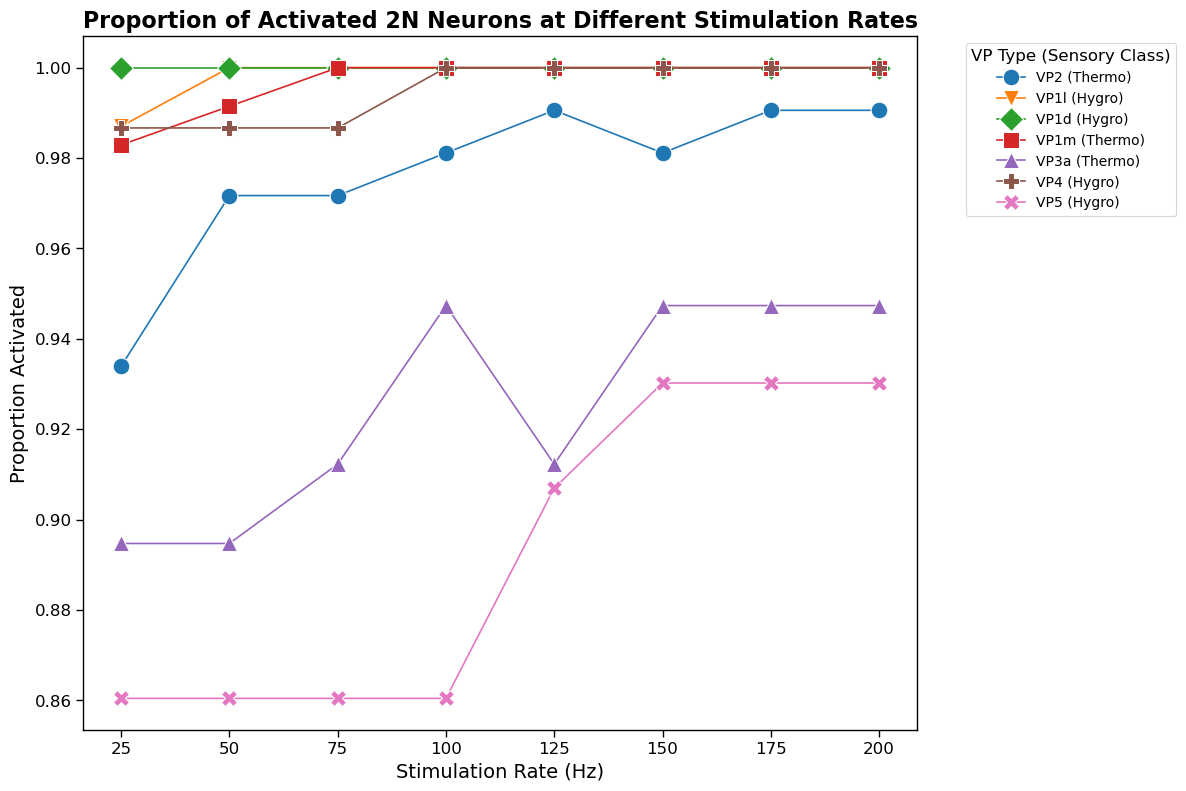

In [101]:
input_intensity = [25, 50, 75, 100, 125, 150, 175, 200]

def get_activation_columns(df):
    return [col for col in df.columns if 'activation' in col]

# Function to calculate the proportion of activated neurons for each frequency
def calculate_proportions(df, frequency):
    total_neurons = df.shape[0]
    activated_neurons = df[df[frequency] == 'activated'].shape[0]
    return activated_neurons / total_neurons

# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for vp in neurons_2N:
    activation_columns = get_activation_columns(neurons_2N[vp])
    proportions[vp] = {freq: calculate_proportions(neurons_2N[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)

sns.set_context('paper')

# Define custom color palette for each VP and classify as thermosensory or hygrosensory
custom_palette = sns.color_palette("tab10", len(neurons_2N))
vp_colors = dict(zip(neurons_2N.keys(), custom_palette))
vp_classification = {vp: 'Thermo' if vp in ['VP2', 'VP3a', 'VP1m'] else 'Hygro' for vp in neurons_2N.keys()}
vp_markers = {
    'VP2': 'o',  # Thermo
    'VP3a': '^', # Thermo 
    'VP1m': 's', # Thermo
    'VP1d': 'D', # Hygro
    'VP1l': 'v', # Hygro
    'VP4': 'P',  # Hygro
    'VP5': 'X'   # Hygro
}

plt.figure(figsize=(12, 8))
for vp in proportions_df.columns:
    sns.lineplot(data=proportions_df[vp], color=vp_colors[vp], marker=vp_markers[vp], markersize=12, label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 2N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks to input_intensity for proper labeling
plt.xticks(range(len(input_intensity)), labels=input_intensity, fontsize=12)

# Customize ticks on the y-axis for better readability
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/2N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

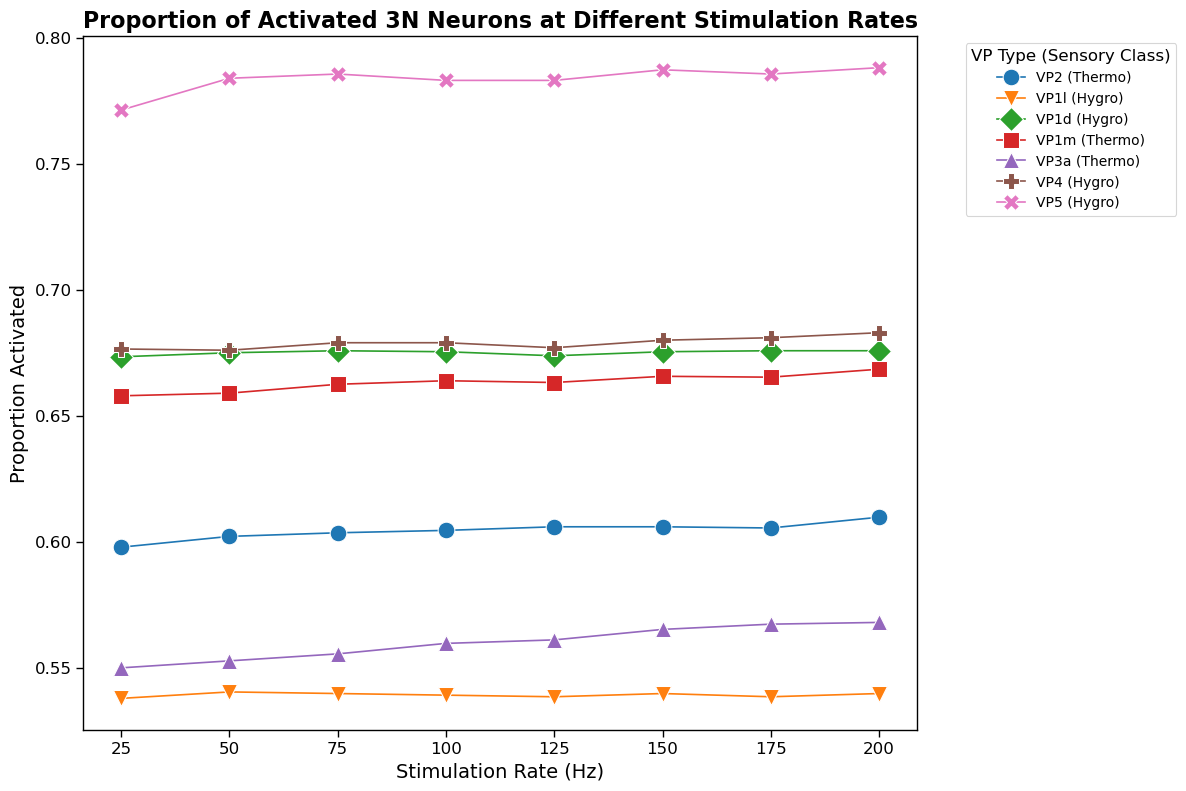

In [102]:
# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for vp in neurons_3N:
    activation_columns = get_activation_columns(neurons_3N[vp])
    proportions[vp] = {freq: calculate_proportions(neurons_3N[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)

sns.set_context('paper')

# Define custom color palette for each VP and classify as thermosensory or hygrosensory
custom_palette = sns.color_palette("tab10", len(neurons_3N))
vp_colors = dict(zip(neurons_3N.keys(), custom_palette))
vp_classification = {vp: 'Thermo' if vp in ['VP2', 'VP3a', 'VP1m'] else 'Hygro' for vp in neurons_3N.keys()}
vp_markers = {
    'VP2': 'o',  # Thermo
    'VP3a': '^', # Thermo 
    'VP1m': 's', # Thermo
    'VP1d': 'D', # Hygro
    'VP1l': 'v', # Hygro
    'VP4': 'P',  # Hygro
    'VP5': 'X'   # Hygro
}

plt.figure(figsize=(12, 8))
for vp in proportions_df.columns:
    sns.lineplot(data=proportions_df[vp], color=vp_colors[vp], marker=vp_markers[vp], markersize=12, label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 3N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks to input_intensity for proper labeling
plt.xticks(range(len(input_intensity)), labels=input_intensity, fontsize=12)

# Customize ticks on the y-axis for better readability
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
# Save the current figure to PDF
plt.savefig('./figures/3N_activation_proportions.pdf', bbox_inches='tight', dpi=300)
plt.show()